In [1]:
from sklearn.decomposition import FastICA
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kurtosis as kurt

In [2]:
data = 'data/penguins.csv'
df = pd.read_csv(data)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [3]:
df=df.drop(['island', 'sex'], axis = 1)
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0
340,Chinstrap,43.5,18.1,202.0,3400.0
341,Chinstrap,49.6,18.2,193.0,3775.0
342,Chinstrap,50.8,19.0,210.0,4100.0


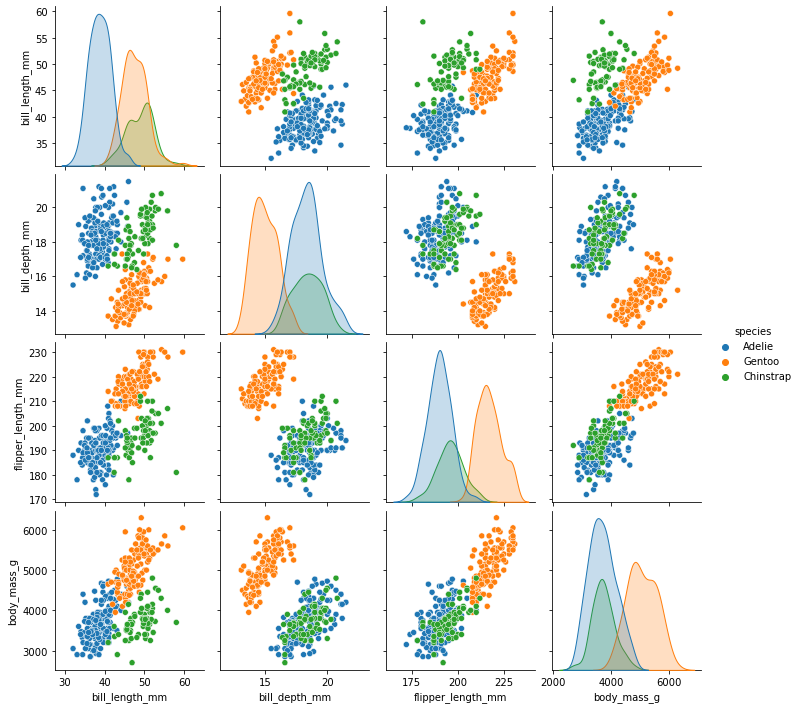

In [4]:
sns.pairplot(df, hue = 'species')
plt.show()

In [5]:
df=df.drop(['species'], axis = 1)
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0


In [6]:
df["bill_length_mm"] = df["bill_length_mm"].fillna(value = df["bill_length_mm"].mean())
df["bill_depth_mm"] = df["bill_depth_mm"].fillna(value = df["bill_depth_mm"].mean())
df["flipper_length_mm"] = df["flipper_length_mm"].fillna(value = df["flipper_length_mm"].mean())
df["body_mass_g"] = df["body_mass_g"].fillna(value = df["body_mass_g"].mean())
df.isna().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

[0.4803516502990288, 0.46367433753625314, 0.5900760323453187, 0.27706066827254894, 0.5623694789148033, 0.2779058570082546, 0.27557259157001296, 0.563527249933937, 0.27781054352221685, 0.27694443608096836, 0.4040880687354124, 0.2768144208929454, 0.2755896997194194, 0.2758326509566036, 0.5641254287102896, 0.27710201910231724, 0.27719537708506065, 0.27582939728844935, 0.27617388809950033, 0.4049933641218292, 0.27501918195086084, 0.5894199752842015, 0.27721403354258206, 0.27776036167472334, 0.27753404139974064, 0.5609080861830773, 0.5661522831369808, 0.5675746972944627]


C:\Users\707609\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:519: UserWarning: n_components is too large: it will be set to 4
  warnings.warn(
C:\Users\707609\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:519: UserWarning: n_components is too large: it will be set to 4
  warnings.warn(
C:\Users\707609\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:519: UserWarning: n_components is too large: it will be set to 4
  warnings.warn(
C:\Users\707609\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:519: UserWarning: n_components is too large: it will be set to 4
  warnings.warn(
C:\Users\707609\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:519: UserWarning: n_components is too large: it will be set to 4
  warnings.warn(
C:\Users\707609\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:519: UserWarning: n_components is too large: it will be set to 4
  warnings.warn(
C:\Users\707609\Anaconda3\lib\site-packa

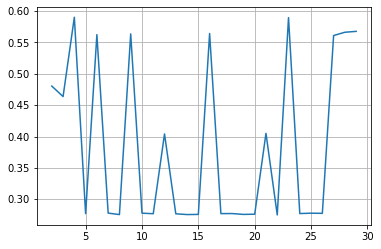

In [32]:
kurtosis = []
n_components = range(2,30)
for i in range(2, 30):
    ica = FastICA(n_components=i, algorithm='parallel', max_iter=100).fit_transform(df)
    kurtosis.append(abs(kurt(ica).mean()))

print(kurtosis)
plt.plot(n_components,kurtosis)
plt.grid()

In [9]:
ica = FastICA(n_components=4, algorithm='parallel', max_iter=300).fit_transform(df)

In [10]:
ica.shape

(344, 4)

In [11]:
data = pd.DataFrame()

In [12]:
data['IC1'], data['IC2'], data['IC3'], data['IC4'] = ica.T

In [13]:
data

,IC1,IC2,IC3,IC4
0,-1.292661e-03,-8.242771e-02,-6.674048e-02,1.406749e-02
1,-2.921663e-02,-6.355943e-02,-3.986877e-02,1.990894e-02
2,-2.801319e-02,8.943582e-02,-3.329909e-02,-4.268926e-03
3,1.831430e-16,3.988446e-17,-6.035616e-17,-1.929197e-16
4,2.199829e-02,8.131720e-02,-6.271441e-02,4.415667e-02
...,...,...,...,...
339,5.721316e-02,6.578172e-02,3.391111e-03,-1.556371e-01
340,-1.172249e-02,1.221512e-01,-1.479090e-02,-2.979100e-02
341,-1.204806e-02,-2.957360e-02,-1.384759e-02,-1.008849e-01
342,5.126171e-02,9.104905e-02,6.654318e-03,-8.356904e-02


C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


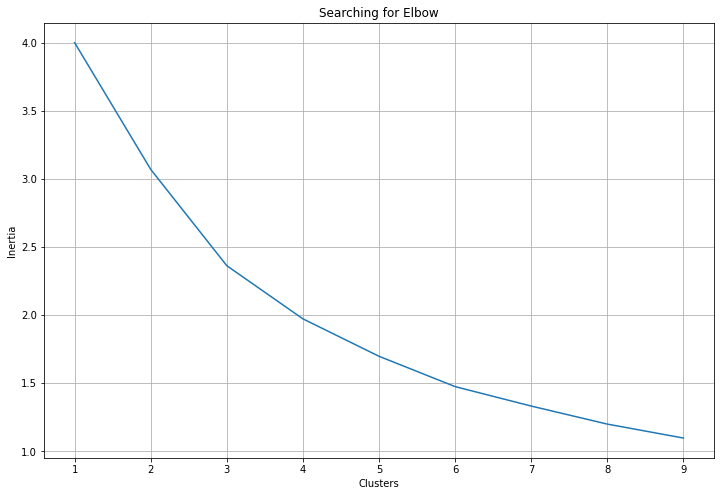

In [14]:
    from sklearn.cluster import KMeans

    clusters = []

    for i in range(1, 10):
        km = KMeans(n_clusters=i).fit(data)
        clusters.append(km.inertia_)

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
    ax.set_title('Searching for Elbow')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Inertia')

    # Annotate arrow


    plt.grid()
    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7580768714308243
For n_clusters = 3 The average silhouette_score is : 0.8936719378864851
For n_clusters = 4 The average silhouette_score is : 0.6235091941487445
For n_clusters = 5 The average silhouette_score is : 0.41794459905237025


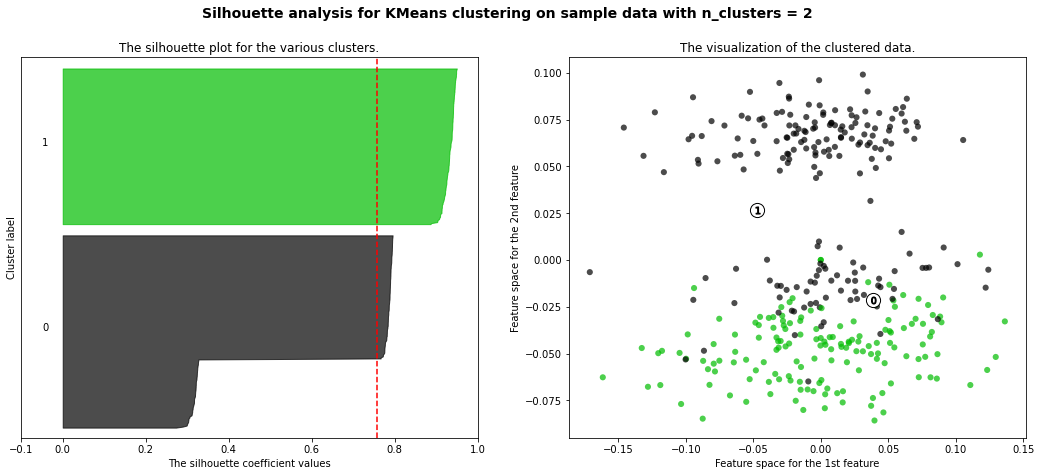

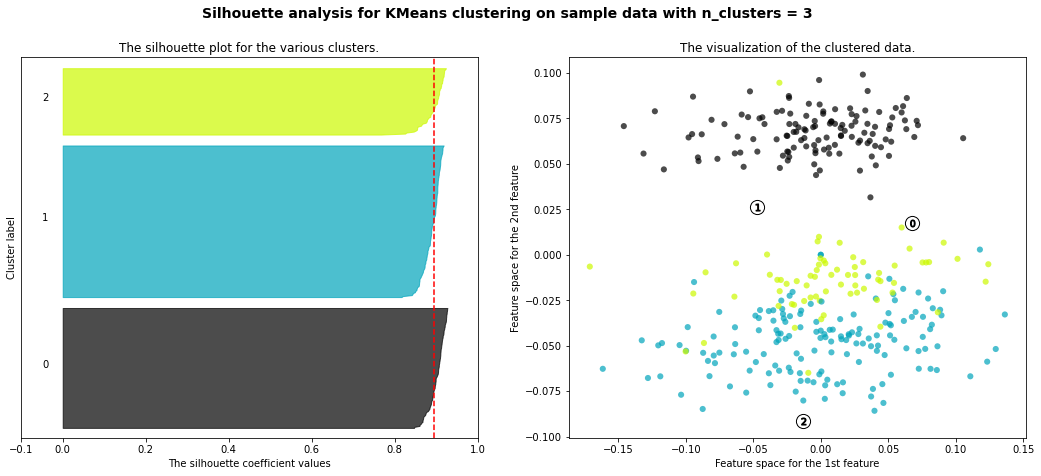

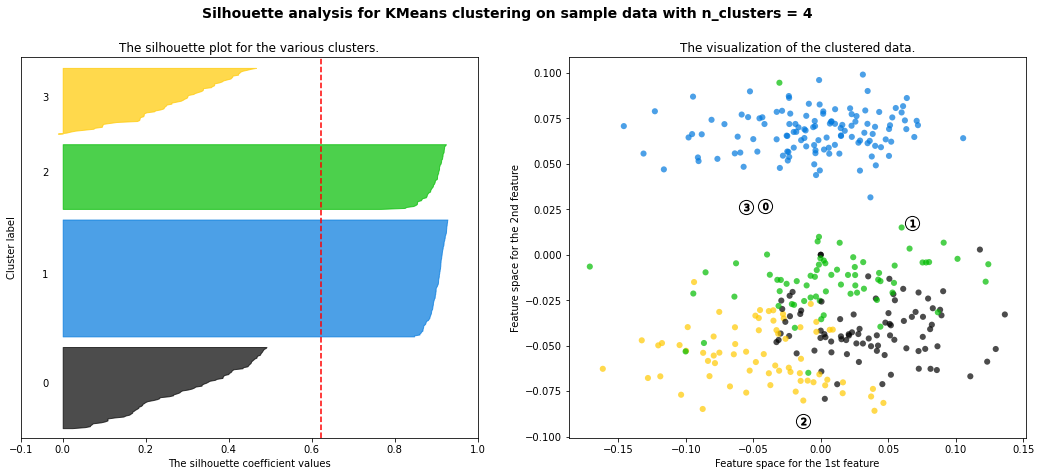

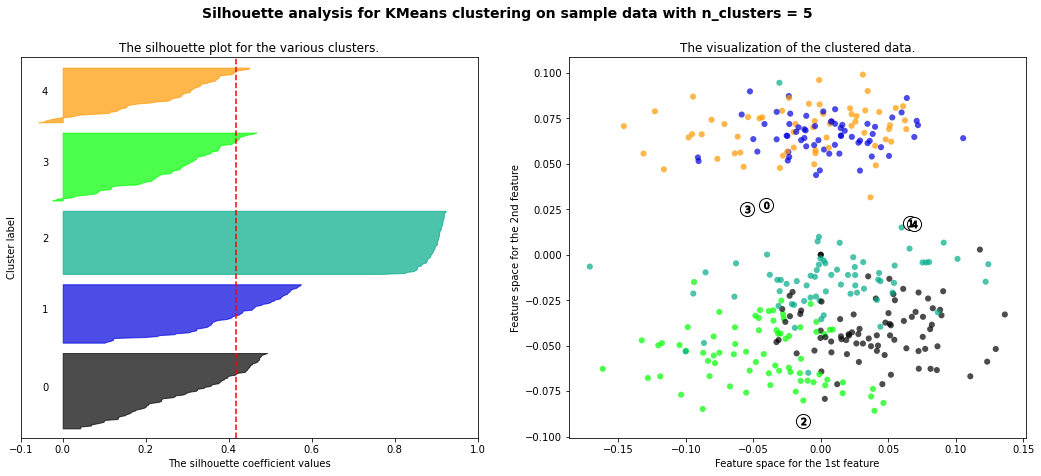

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data['IC2'], data['IC3'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 2],
        centers[:, 3],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[2], c[3], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [16]:
km = KMeans(n_clusters= 3, random_state=10, max_iter = 600, tol = 1)

In [17]:
model = km.fit(data)

In [18]:
cluster_labels = model.labels_
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [19]:
data['labels'] = cluster_labels
data

,IC1,IC2,IC3,IC4,labels
0,-1.292661e-03,-8.242771e-02,-6.674048e-02,1.406749e-02,0
1,-2.921663e-02,-6.355943e-02,-3.986877e-02,1.990894e-02,0
2,-2.801319e-02,8.943582e-02,-3.329909e-02,-4.268926e-03,0
3,1.831430e-16,3.988446e-17,-6.035616e-17,-1.929197e-16,0
4,2.199829e-02,8.131720e-02,-6.271441e-02,4.415667e-02,0
...,...,...,...,...,...
339,5.721316e-02,6.578172e-02,3.391111e-03,-1.556371e-01,1
340,-1.172249e-02,1.221512e-01,-1.479090e-02,-2.979100e-02,1
341,-1.204806e-02,-2.957360e-02,-1.384759e-02,-1.008849e-01,1
342,5.126171e-02,9.104905e-02,6.654318e-03,-8.356904e-02,1


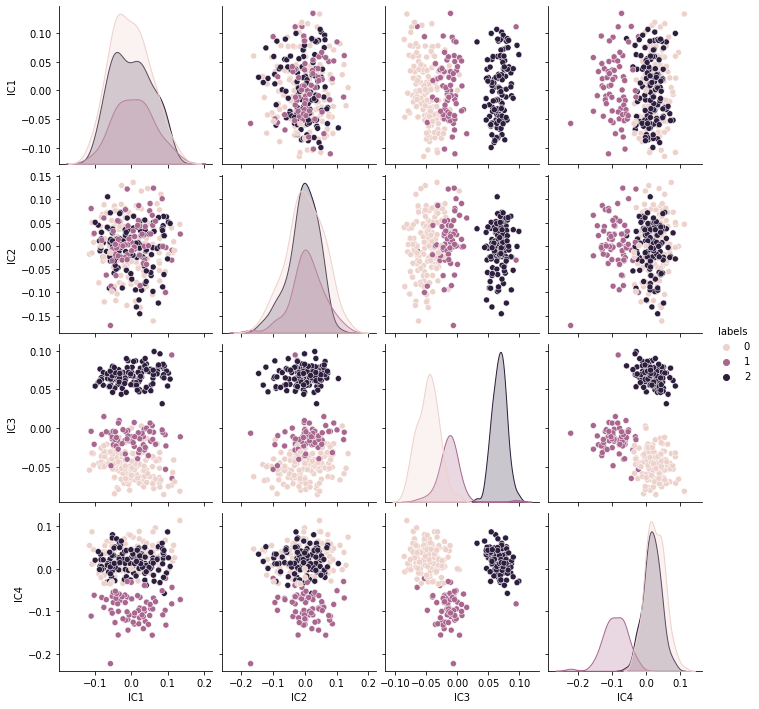

In [20]:
sns.pairplot(data, hue = 'labels')
plt.show()

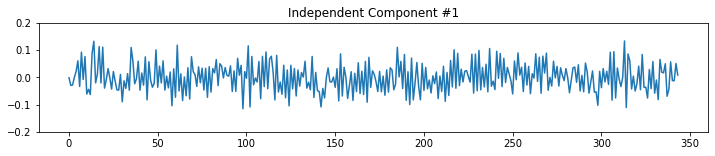

0.6932062633261453


In [21]:
result_IC1 = ica[:,0]
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_IC1)
plt.ylim(-0.2, 0.2)
plt.show()
print(abs(kurt(ica[:,0])))

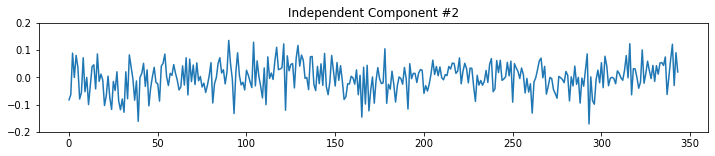

0.1899829000864912


In [22]:
result_IC2 = ica[:,1]
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_IC2)
plt.ylim(-0.2, 0.2)
plt.show()
print(abs(kurt(ica[:,1])))

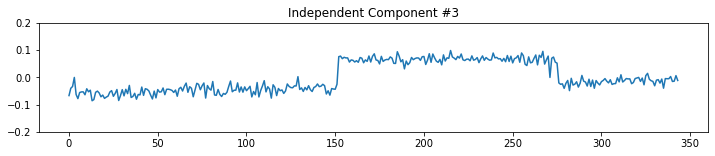

1.4517699650144682


In [23]:
result_IC2 = ica[:,2]
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(result_IC2)
plt.ylim(-0.2, 0.2)
plt.show()
print(abs(kurt(ica[:,2])))

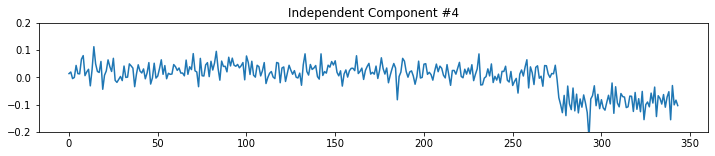

0.855106180521664


In [24]:
result_IC2 = ica[:,3]
plt.figure(figsize=(12,2))
plt.title('Independent Component #4')
plt.plot(result_IC2)
plt.ylim(-0.2, 0.2)
plt.show()
print(abs(kurt(ica[:,3])))

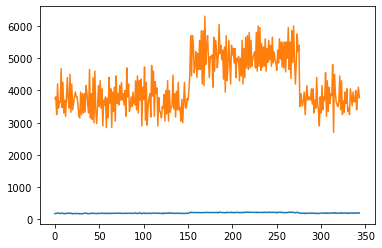

In [29]:
#plt.plot(df.iloc[:, 0])
#plt.plot(df.iloc[:, 1])
plt.plot(df.iloc[:, 2])
plt.plot(df.iloc[:, 3])

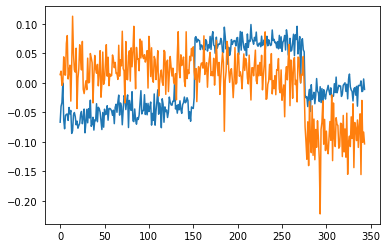

In [28]:
plt.plot(data.iloc[:, 2])
plt.plot(data.iloc[:, 3])

In [33]:
dataset = data.drop(['labels'], axis = 1)

For n_components = 2 The average silhouette_score is : 0.2103370665074791
For n_components = 3 The average silhouette_score is : 0.31077821398607497
For n_components = 4 The average silhouette_score is : 0.2941709496900211
For n_components = 5 The average silhouette_score is : 0.2821117506034471


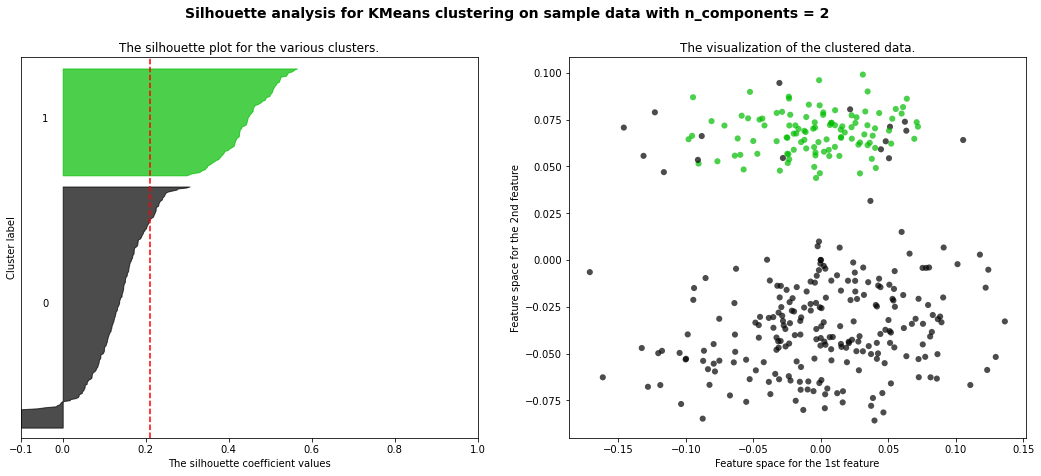

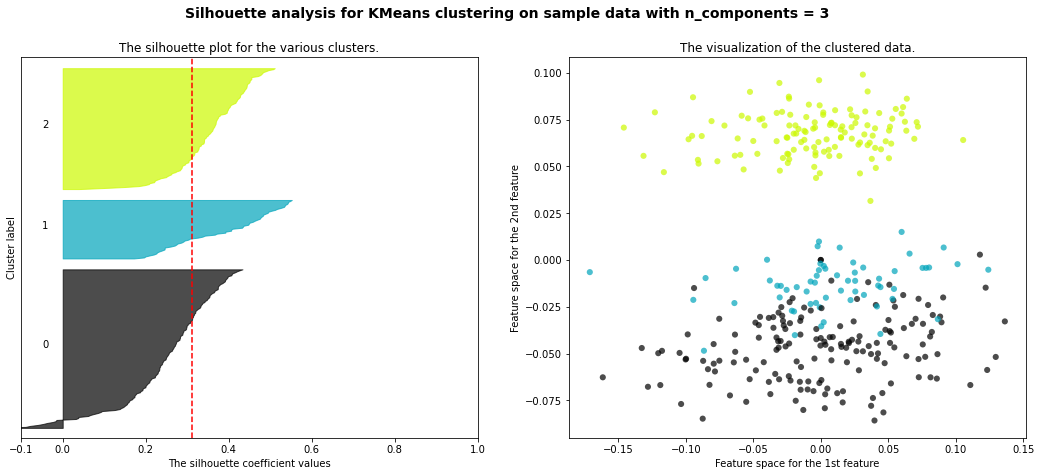

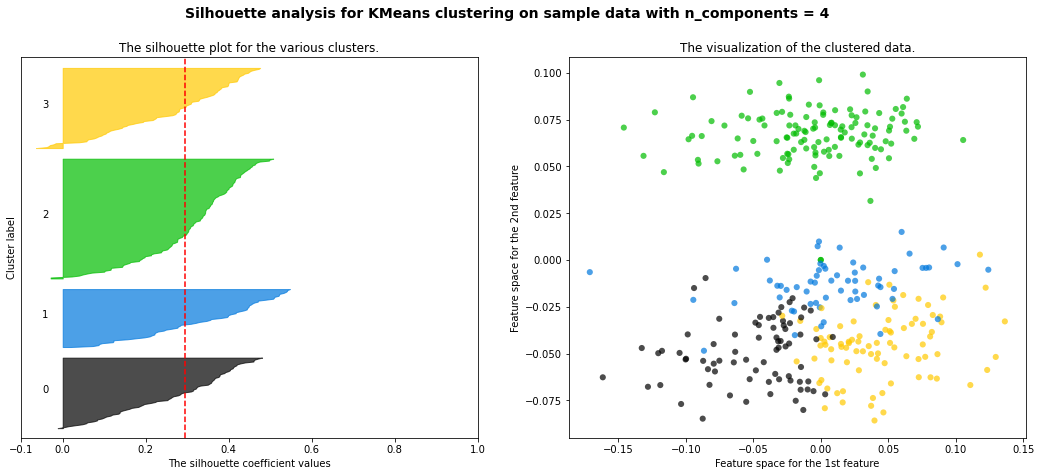

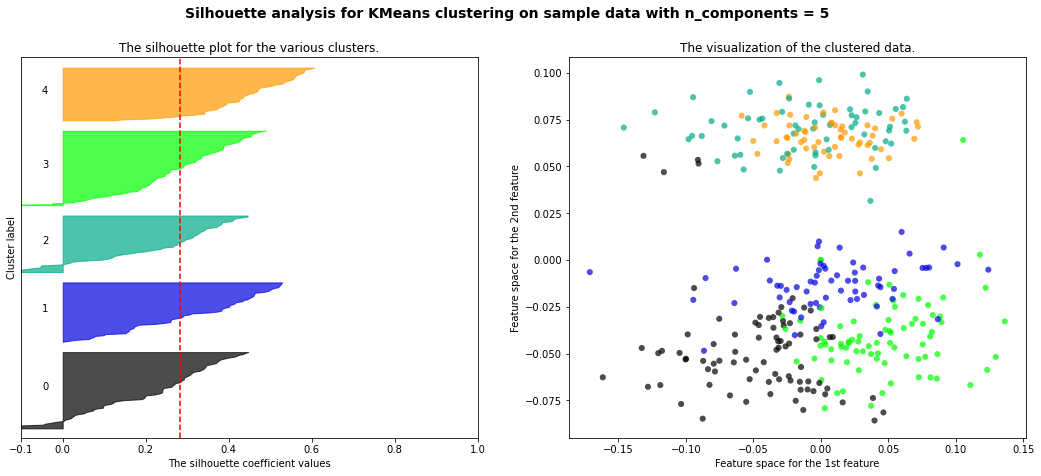

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import mixture


range_n_components = [2, 3, 4, 5]

for n_components in range_n_components:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset) + (n_components + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    gmm = mixture.GaussianMixture(
    n_components=n_components, covariance_type='spherical', max_iter = 600, tol = 1, random_state = 4
        )
    cluster_labels = gmm.fit_predict(dataset)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    print(
        "For n_components =",
        n_components,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

    y_lower = 10
    for i in range(n_components):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_components)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_components)
    ax2.scatter(
        dataset['IC2'], dataset['IC3'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )



    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_components = %d"
        % n_components,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [36]:
    gmm = mixture.GaussianMixture(
    n_components=3, covariance_type='spherical', max_iter = 600, tol = 0.01, random_state = 4
        )

In [37]:
model = gmm.fit(dataset)

In [38]:
labels = gmm.predict(dataset)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [39]:
dataset['labels'] = labels
dataset

,IC1,IC2,IC3,IC4,labels
0,-1.292661e-03,-8.242771e-02,-6.674048e-02,1.406749e-02,0
1,-2.921663e-02,-6.355943e-02,-3.986877e-02,1.990894e-02,0
2,-2.801319e-02,8.943582e-02,-3.329909e-02,-4.268926e-03,0
3,1.831430e-16,3.988446e-17,-6.035616e-17,-1.929197e-16,0
4,2.199829e-02,8.131720e-02,-6.271441e-02,4.415667e-02,0
...,...,...,...,...,...
339,5.721316e-02,6.578172e-02,3.391111e-03,-1.556371e-01,1
340,-1.172249e-02,1.221512e-01,-1.479090e-02,-2.979100e-02,0
341,-1.204806e-02,-2.957360e-02,-1.384759e-02,-1.008849e-01,1
342,5.126171e-02,9.104905e-02,6.654318e-03,-8.356904e-02,1


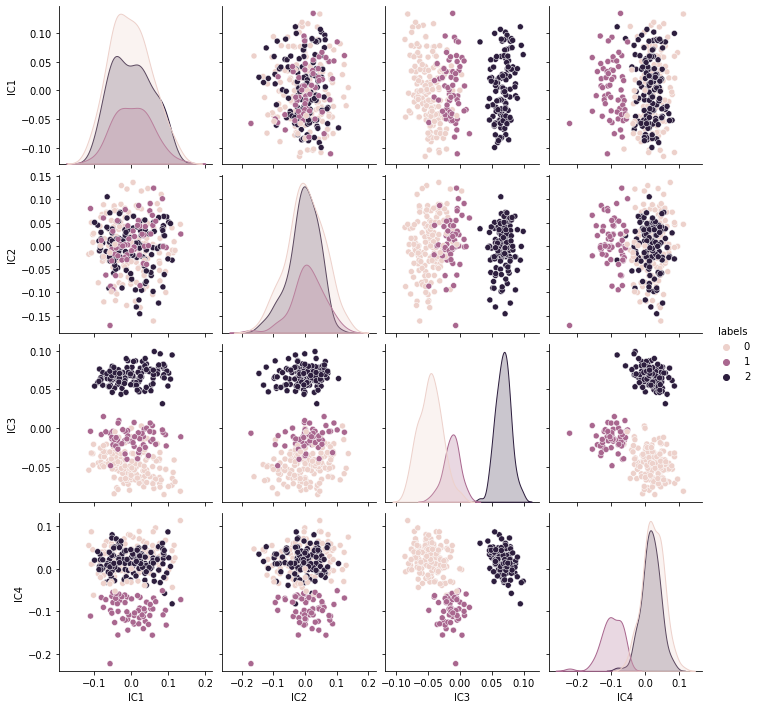

In [40]:
sns.pairplot(dataset, hue = 'labels')
plt.show()